In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import sympy

In [532]:
N = 20
K_MAT = np.array([
    [1.43950, -0.2121, -0.1057],
    [-0.2121, 1.9449, -0.2001],
    [-0.1057, -0.2001, 1.6183]
])
A_MAT = np.array([
    [-0.4639, -0.2629, 0.0400],
    [-0.2112, 0.1067, 0.1647],
    [-0.0418, -0.6390, -0.1428]
])
B_MAT = np.identity(3)

In [533]:
G = nx.Graph()

G_adj_mat = np.array([
    (0, 1), (0, 2), (0, 3), (0, 5), (0, 8), (0, 9), (0, 12), (0, 13), (0, 15), (0, 17), (0, 18),
    (1, 9), (1, 13), (1, 14), (1, 19),
    (2, 14), (2, 15), (2, 16),
    (3, 4), (3, 7), (3, 16), (3, 20),
    (4, 6), (4, 8), (4, 15),
    (5, 6), (5, 8), (5, 9), (5, 10), (5, 11), (5, 13), (5, 18),
    (6, 10), (6, 11),
    (7, 10), (7, 13), (7, 16),
    (8, 9), (8, 10), (8, 14), (8, 15), (8, 16), (8, 20),
    (9, 14), (9, 15), (9, 16),
    (10, 17),
    (11, 18),
    (12, 15), (12, 19), (12, 20),
    (13, 15), (13, 17), (13, 18), (13, 20),
    (14, 19), (14, 20),
    (15, 19),
    (16, 20),
    (17, 18), (17, 19),
    (18, 19),
])
G.add_nodes_from(range(N + 1))
G.add_edges_from(G_adj_mat)

In [534]:
sub_G = nx.subgraph(G, range(1, N + 1))
sub_G_adj_mat = nx.to_numpy_array(sub_G)

# Mat
L_adj_mat = scipy.sparse.csgraph.laplacian(sub_G_adj_mat)
informed_nodes = (1, 2, 3, 5, 8, 9, 12, 13, 15, 17, 18)
informed_symbols = []
for i in range(N):
    if np.isin(i, informed_nodes):
        informed_symbols.append(1)
    else:
        informed_symbols.append(0)

D_mat = np.diag(informed_symbols)

H_adj_mat = L_adj_mat + D_mat
print(H_adj_mat)

eig = np.linalg.eig(H_adj_mat)
eig[0]

[[ 4.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1. -1.  0.  0.  0.  0.
  -1.  0.]
 [ 0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.
   0.  0.]
 [ 0.  0.  5. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
   0. -1.]
 [ 0.  0. -1.  5.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  7. -1.  0. -1. -1. -1. -1.  0. -1.  0.  0.  0.  0. -1.
   0.  0.]
 [ 0.  0.  0. -1. -1.  5.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  0.  0.  0.  4.  0.  0. -1.  0.  0. -1.  0.  0. -1.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1. -1.  0.  0.  8. -1. -1.  0.  0.  0. -1. -1. -1.  0.  0.
   0. -1.]
 [-1.  0.  0.  0. -1.  0.  0. -1.  7.  0.  0.  0.  0. -1. -1. -1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1. -1. -1. -1.  0.  6.  0.  0.  0.  0.  0.  0. -1.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0. -1.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0. -1.  0.

array([ 0.50337029, 10.57357182,  1.81608165,  9.70165891,  9.35233769,
        2.44857935,  2.82121729,  3.01209371,  8.64793611,  3.70080902,
        3.83981145,  4.50418979,  4.91393634,  5.48684926,  7.78663061,
        7.45496754,  6.93965548,  6.78673372,  6.54433562,  6.16523436])

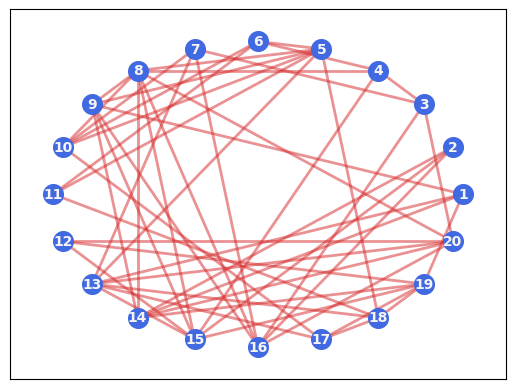

In [535]:
pos = nx.circular_layout(sub_G)
nx.draw_networkx_nodes(sub_G, pos, node_size=200, node_color='#4169E1')
nx.draw_networkx_edges(sub_G, pos, width=2,
                       alpha=0.5,
                       edge_color="tab:red", )
nx.draw_networkx_labels(sub_G, pos, font_size=10, font_weight='heavy', font_color="whitesmoke")
plt.show()

In [536]:
x0_init = np.array([1.0, 2.0, 3.0]).T

x1_init = np.array([3.9, 6.2, 1.6]).T
x2_init = np.array([2.4, 7.1, 3.3]).T
x3_init = np.array([4.9, 4.2, 1.0]).T
x4_init = np.array([0.0, 3.6, 0.0]).T
x5_init = np.array([0.1, 2.7, 1.5]).T

x6_init = np.array([0.3, 3.9, 2.7]).T
x7_init = np.array([2.1, 3.3, 1.5]).T
x8_init = np.array([2.6, 3.6, 2.0]).T
x9_init = np.array([0.5, 5.8, 0.9]).T

x10_init = np.array([0.6, 2.9, 1.6]).T
x11_init = np.array([1.2, 2.1, 2.0]).T
x12_init = np.array([1.9, 2.5, 1.5]).T
x13_init = np.array([3.2, 2.3, 1.5]).T
x14_init = np.array([3.1, 7.3, 3.6]).T
x15_init = np.array([0.4, 5.9, 3.3]).T

x16_init = np.array([1.4, 4.3, 0.8]).T
x17_init = np.array([3.5, 2.8, 2.3]).T
x18_init = np.array([4.8, 5.7, 3.2]).T
x19_init = np.array([2.6, 0.6, 3.1]).T
x20_init = np.array([4.4, 6.7, 0.9]).T

In [537]:
x0 = np.array([[x0_init]])
print(x0.shape)
x0

(1, 1, 3)


array([[[1., 2., 3.]]])

In [538]:
dx0 = np.array(
    (np.matmul(A_MAT, x0.transpose((0, 2, 1)))).transpose((0, 2, 1))
)
dx0

array([[[-0.8697,  0.4963, -1.7482]]])

In [539]:
x = np.array([
    [

        x1_init, x2_init, x3_init, x4_init, x5_init,
        x6_init, x7_init, x8_init, x9_init, x10_init,
        x11_init, x12_init, x13_init, x14_init, x15_init,
        x16_init, x17_init, x18_init, x19_init, x20_init

    ]
])
print(x.shape)
x

(1, 20, 3)


array([[[3.9, 6.2, 1.6],
        [2.4, 7.1, 3.3],
        [4.9, 4.2, 1. ],
        [0. , 3.6, 0. ],
        [0.1, 2.7, 1.5],
        [0.3, 3.9, 2.7],
        [2.1, 3.3, 1.5],
        [2.6, 3.6, 2. ],
        [0.5, 5.8, 0.9],
        [0.6, 2.9, 1.6],
        [1.2, 2.1, 2. ],
        [1.9, 2.5, 1.5],
        [3.2, 2.3, 1.5],
        [3.1, 7.3, 3.6],
        [0.4, 5.9, 3.3],
        [1.4, 4.3, 0.8],
        [3.5, 2.8, 2.3],
        [4.8, 5.7, 3.2],
        [2.6, 0.6, 3.1],
        [4.4, 6.7, 0.9]]])

In [540]:
delta = x - x0_init
print(delta.shape)
delta

(1, 20, 3)


array([[[ 2.9,  4.2, -1.4],
        [ 1.4,  5.1,  0.3],
        [ 3.9,  2.2, -2. ],
        [-1. ,  1.6, -3. ],
        [-0.9,  0.7, -1.5],
        [-0.7,  1.9, -0.3],
        [ 1.1,  1.3, -1.5],
        [ 1.6,  1.6, -1. ],
        [-0.5,  3.8, -2.1],
        [-0.4,  0.9, -1.4],
        [ 0.2,  0.1, -1. ],
        [ 0.9,  0.5, -1.5],
        [ 2.2,  0.3, -1.5],
        [ 2.1,  5.3,  0.6],
        [-0.6,  3.9,  0.3],
        [ 0.4,  2.3, -2.2],
        [ 2.5,  0.8, -0.7],
        [ 3.8,  3.7,  0.2],
        [ 1.6, -1.4,  0.1],
        [ 3.4,  4.7, -2.1]]])

In [541]:
q = -np.matmul(H_adj_mat, delta)
print(q.shape)
q

(1, 20, 3)


array([[[ -6.2,  -8.8,   2.7],
        [ -3.7,  -8.9,  -2.5],
        [-15.6,  -1.1,   1.2],
        [  9.2,   1.6,  12. ],
        [ 12.5,   7.4,   3.4],
        [  1.4,  -6.2,  -5.4],
        [  1.7,   0.5,  -1.1],
        [-10.3,  10.4,  -3.4],
        [  9. ,  -8.6,   9.5],
        [  6. ,   0.9,   3.4],
        [  1.6,   6. ,   1.4],
        [  1.7,   5.7,   2.8],
        [ -5.4,  16.9,   5.3],
        [ -4.3, -19.1, -10.4],
        [ 10.4, -15.8, -10.8],
        [  8.1,   2.6,   7. ],
        [ -2.8,   0.3,   0.2],
        [-17.2, -21.7,  -5.8],
        [  0.4,  28.2,  -3.2],
        [ -9.3, -16. ,   5. ]]])

In [542]:
u = np.array(
    np.matmul(K_MAT, q.transpose((0, 2, 1))).transpose((0, 2, 1)),
)
u

array([[[ -7.34381, -16.34037,   6.78563],
        [ -3.17421, -16.02459,  -1.87377],
        [-22.34973,   0.92925,   3.81099],
        [ 11.63564,  -1.24068,  18.127  ],
        [ 16.06483,  11.06067,   2.70023],
        [  3.9011 , -11.27478,  -7.64618],
        [  2.45737,   0.83199,  -2.05987],
        [-16.67331,  23.09193,  -6.49455],
        [ 13.77541, -20.53599,  16.14341],
        [  8.08673,  -0.20253,   4.68793],
        [  0.88262,  11.0499 ,   0.8959 ],
        [  0.94222,  10.16508,   3.21098],
        [-11.918  ,  32.95362,   5.76608],
        [ -1.03946, -34.15452, -12.5539 ],
        [ 19.46354, -30.77418, -15.41534],
        [ 10.36859,   1.93803,   9.95167],
        [ -4.11537,   1.13733,   0.55959],
        [-19.54377, -37.39563,  -3.22593],
        [ -5.06718,  55.40166, -10.86366],
        [-10.52225, -30.14637,  12.27611]]])

In [543]:
dx = np.array(
    (np.matmul(A_MAT, x.transpose((0, 2, 1))) + np.matmul(B_MAT, x.transpose((0, 2, 1)))).transpose((0, 2, 1))
)
dx

array([[[ 0.52481,  6.30138, -2.7533 ],
        [-0.44795,  7.8942 , -1.80846],
        [ 1.56271,  3.77796, -2.03142],
        [-0.94644,  3.98412, -2.3004 ],
        [-0.59622,  3.21402, -0.44368],
        [-0.75648,  4.69746, -0.1902 ],
        [ 0.31824,  3.45564, -0.91068],
        [ 0.52742,  3.7644 , -0.69468],
        [-1.22077,  6.46149, -2.95562],
        [-0.37675,  3.34623, -0.50666],
        [ 0.17123,  2.40003,  0.32234],
        [ 0.42134,  2.61252, -0.39112],
        [ 1.17085,  2.11662, -0.31766],
        [-0.11326,  8.01711, -1.70836],
        [-1.20467,  6.98856, -0.95806],
        [-0.34793,  4.59489, -2.12046],
        [ 1.23223,  2.73837,  0.03606],
        [ 1.20275,  5.82147, -1.0999 ],
        [ 1.36012,  0.62547,  2.16524],
        [ 0.63341,  6.63384, -3.69374]]])

In [544]:
T_TOTAL = 6
T_TOTAL_SLICE_NUM = 1500
T_SINGLE_SLICE_TIME = T_TOTAL / T_TOTAL_SLICE_NUM
T_SLICE_LIST = np.linspace(0, T_TOTAL, T_TOTAL_SLICE_NUM)
T_SLICE_LIST

array([0.00000000e+00, 4.00266845e-03, 8.00533689e-03, ...,
       5.99199466e+00, 5.99599733e+00, 6.00000000e+00])

In [545]:
for k in range(1, T_TOTAL_SLICE_NUM):
    x_cur = x[k - 1] + dx[k - 1] * T_SINGLE_SLICE_TIME
    dx_cur = (np.matmul(A_MAT, x_cur.T) + np.matmul(B_MAT, u[k - 1].T)).T

    x0_cur = x0[k - 1] + dx0[k - 1] * T_SINGLE_SLICE_TIME
    dx0_cur = (np.matmul(A_MAT, x0_cur.T)).T

    delta_cur = x_cur - x0_cur
    q_cur = -np.matmul(H_adj_mat, delta_cur)
    u_cur = np.matmul(K_MAT, q_cur.T).T

    x = np.append(x, [x_cur], axis=0)
    dx = np.append(dx, [dx_cur], axis=0)

    x0 = np.append(x0, [x0_cur], axis=0)
    dx0 = np.append(dx0, [dx0_cur], axis=0)

    delta = np.append(delta, [delta_cur], axis=0)
    q = np.append(q, [q_cur], axis=0)
    u = np.append(u, [u_cur], axis=0)
x

array([[[ 3.9       ,  6.2       ,  1.6       ],
        [ 2.4       ,  7.1       ,  3.3       ],
        [ 4.9       ,  4.2       ,  1.        ],
        ...,
        [ 4.8       ,  5.7       ,  3.2       ],
        [ 2.6       ,  0.6       ,  3.1       ],
        [ 4.4       ,  6.7       ,  0.9       ]],

       [[ 3.90209924,  6.22520552,  1.5889868 ],
        [ 2.3982082 ,  7.1315768 ,  3.29276616],
        [ 4.90625084,  4.21511184,  0.99187432],
        ...,
        [ 4.804811  ,  5.72328588,  3.1956004 ],
        [ 2.60544048,  0.60250188,  3.10866096],
        [ 4.40253364,  6.72653536,  0.88522504]],

       [[ 3.85919108,  6.16025129,  1.59865763],
        [ 2.37408852,  7.07066547,  3.26476096],
        [ 4.80347397,  4.2171365 ,  0.99495757],
        ...,
        [ 4.7122128 ,  5.57419222,  3.16543927],
        [ 2.5802009 ,  0.82421258,  3.06145503],
        [ 4.34534331,  6.60568469,  0.91589471]],

       ...,

       [[-1.83876052,  2.85578879, -6.05408789],
        [-1

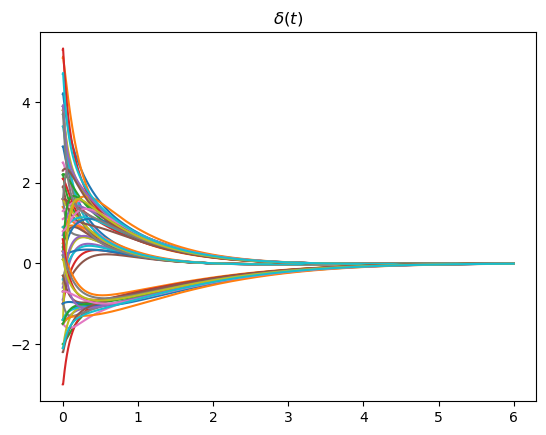

In [546]:
plt.plot(T_SLICE_LIST, delta[:, :, 0])
plt.plot(T_SLICE_LIST, delta[:, :, 1])
plt.plot(T_SLICE_LIST, delta[:, :, 2])
plt.title(r'$\delta(t)$')
plt.show()

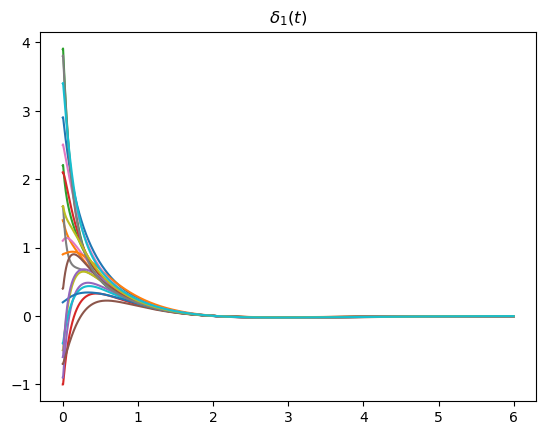

In [547]:
plt.plot(T_SLICE_LIST, delta[:, :, 0])
plt.title(r'$\delta_1(t)$')
plt.show()

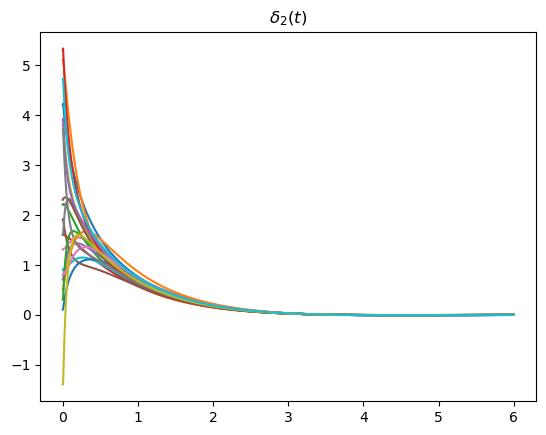

In [548]:
plt.plot(T_SLICE_LIST, delta[:, :, 1])
plt.title(r'$\delta_2(t)$')
plt.show()

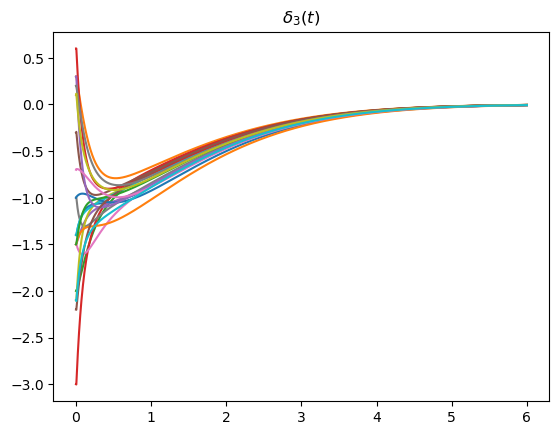

In [549]:
plt.plot(T_SLICE_LIST, delta[:, :, 2])
plt.title(r'$\delta_3(t)$')
plt.show()

In [550]:
x.shape

(1500, 20, 3)

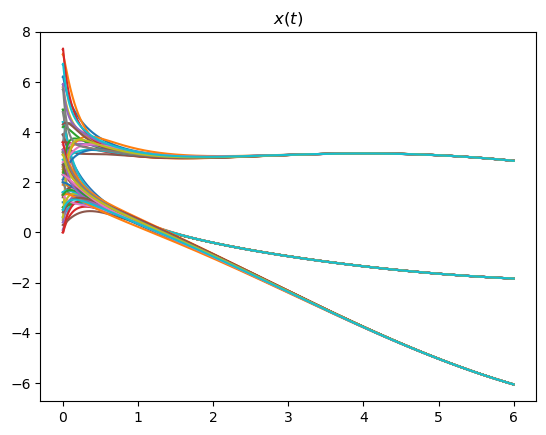

In [551]:
plt.plot(T_SLICE_LIST, x[:, :, 0])
plt.plot(T_SLICE_LIST, x[:, :, 1])
plt.plot(T_SLICE_LIST, x[:, :, 2])
plt.title(r'$x(t)$')
plt.show()